In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CC GENERAL.csv')  # Load the dataset

In [3]:
data.dropna(inplace=True)  # Handle missing values
data.head()  # Explore the dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [4]:
selected_features = data[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [5]:
from scipy.spatial.distance import euclidean

# Example distance calculation
distance = euclidean(scaled_features[0], scaled_features[1])

In [6]:
Z = linkage(scaled_features, method='ward')  # Ward linkage

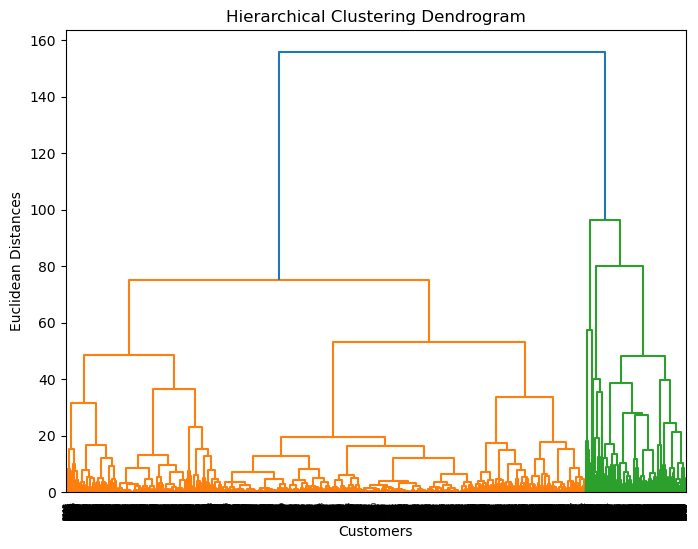

In [7]:
plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

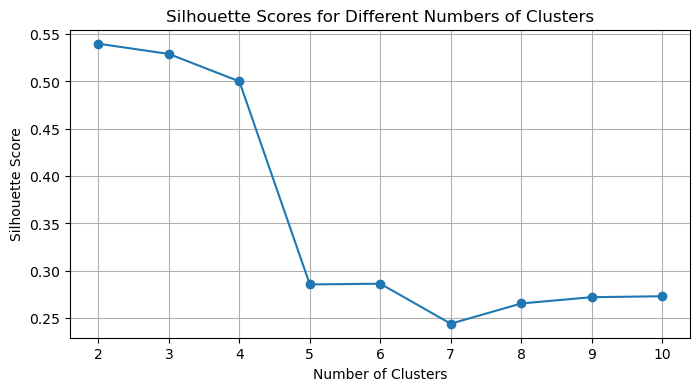

(2,
 [0.5398460335209913,
  0.5290206888371946,
  0.5000532613160041,
  0.28550295831615013,
  0.28627162737782436,
  0.24398617020796154,
  0.2653877263117579,
  0.2720202250426048,
  0.27302021371932506])

In [8]:
 #Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []
for num_clusters in range(2, 11):
    # Using fcluster to assign cluster labels
    cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
    # Calculating silhouette score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Identify the optimal number of clusters
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2

optimal_num_clusters, silhouette_scores